In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
# load data
df_customer = pd.read_csv("E:\Certifications\Machine Learning & Data Science\Kalbe\data\Customer.csv", delimiter = ';')
df_transaction = pd.read_csv("E:\Certifications\Machine Learning & Data Science\Kalbe\data\Transaction.csv", delimiter = ';')

In [3]:
# Check transaction dataframe info
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


Setelah melihat info dari data transaksi, tidak ditemukan adanya data kosong. namun, pada kolom date terdeteksi sebagai tipe data objek.

In [4]:
# convert Date to datetime
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'], format='%d/%m/%Y')

In [5]:
# check transaction dataframe info after convert date
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 313.9+ KB


In [6]:
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [7]:
# check customer dataframe info
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [8]:
df_customer[df_customer['Marital Status'].isnull()]

,CustomerID,Age,Gender,Marital Status,Income
9,10,34,1,NaN,4
415,416,27,1,NaN,"3,43"
442,443,33,1,NaN,"9,28"


In [9]:
# fill missing values on df_customer
df_customer.fillna(method='ffill', inplace=True)

# convert categorical data to numerical
df_customer['Marital Status'] = df_customer['Marital Status'].apply(lambda x: 1 if x == 'Married' else 0)

# convert Income to float
df_customer['Income'] = df_customer['Income'].apply(lambda x: x.replace(',', '.')).astype(float)

In [10]:
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,1,5.12
1,2,60,1,1,6.23
2,3,32,1,1,9.17
3,4,31,1,1,4.87
4,5,58,1,1,3.57


In [11]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      447 non-null    int64  
 1   Age             447 non-null    int64  
 2   Gender          447 non-null    int64  
 3   Marital Status  447 non-null    int64  
 4   Income          447 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 17.6 KB


In [12]:
# merge df_transaction and df_customer
merged_df = pd.merge(df_transaction, df_customer, on='CustomerID', how='left')
merged_df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,1,10.53
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,44,1,1,14.58
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,27,1,0,0.18
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,48,1,1,12.57
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,33,0,1,6.95


In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price           5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Age             5020 non-null   int64         
 9   Gender          5020 non-null   int64         
 10  Marital Status  5020 non-null   int64         
 11  Income          5020 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(8), object(2)
memory usage: 509.8+ KB


In [42]:
# aggregate data
agg = {
    'TransactionID': 'count',
    'Qty': 'sum',
    'Age' : 'first'
}
cluster_df = merged_df.groupby('CustomerID').aggregate(agg).reset_index()
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     447 non-null    int64
 1   TransactionID  447 non-null    int64
 2   Qty            447 non-null    int64
 3   Age            447 non-null    int64
dtypes: int64(4)
memory usage: 14.1 KB


In [43]:
# scale data into same range
scaler = StandardScaler()
scaled_df = scaler.fit_transform(cluster_df[['TransactionID', 'Qty', 'Age']])
scaled_df = pd.DataFrame(scaled_df, columns=['TransactionID', 'Qty', 'Age'])
scaled_df.head()

,TransactionID,Qty,Age
0,1.779816,1.496527,1.185648
1,0.545884,1.261093,1.575227
2,1.162850,1.182615,-0.606420
3,-0.379565,0.397833,-0.684336
4,-1.305014,-1.093251,1.419395


In [44]:
# finding optimal number of clusters
inertia = []
max_clusters = 11
for n_cluster in range(1, max_clusters):
    kmeans = KMeans(n_clusters=n_cluster, random_state=42, n_init=n_cluster)
    kmeans.fit(cluster_df.drop('CustomerID', axis=1))
    inertia.append(kmeans.inertia_)

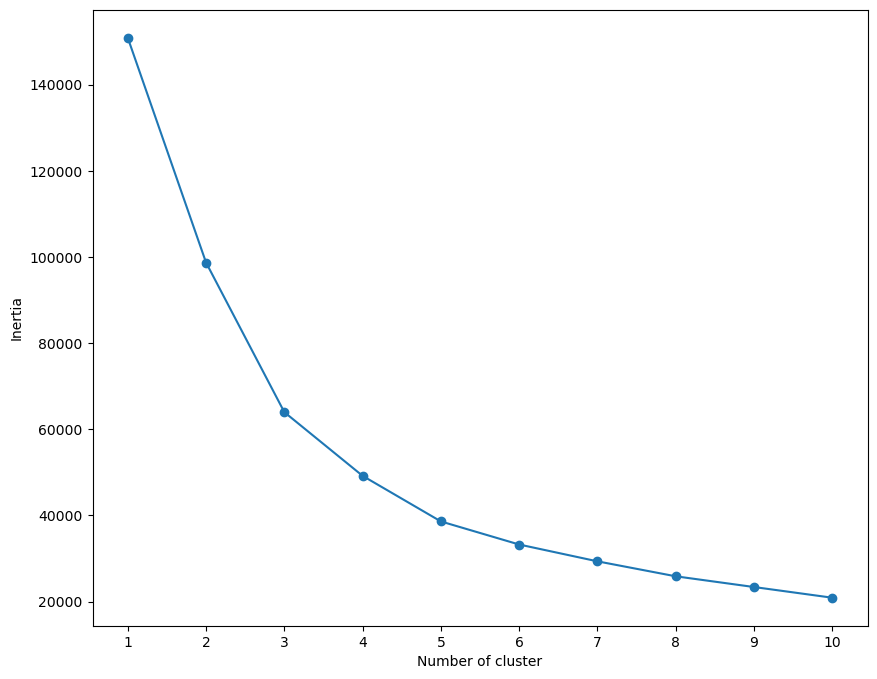

In [45]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(1, max_clusters), inertia, marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.xticks(np.arange(1, max_clusters))
plt.show()

In [53]:
# create cluster
n_cluster = 4
kmeans = KMeans(n_clusters=n_cluster, random_state=42, n_init=n_cluster)
kmeans.fit(cluster_df.drop('CustomerID', axis=1))
cluster_df['Cluster'] = kmeans.labels_

<Axes: xlabel='Qty', ylabel='Age'>

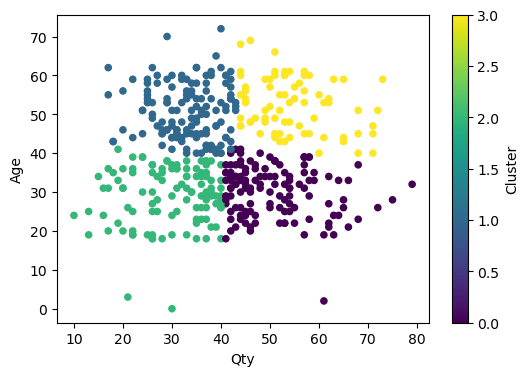

In [66]:
# plot cluster
cluster_df.plot(kind='scatter', x='Qty', y='Age', c='Cluster', cmap='viridis', figsize=(6,4), legend=True)

In [62]:
cluster_df.groupby(['Cluster']).agg({
    'CustomerID' : 'count',
    'Qty' : 'mean',
    'Age' : 'first',
    'TransactionID' : 'count'
}).rename(columns={
    'CustomerID' : 'Customer_Count',
    "TransactionID" : 'Transaction_Count'
})

,Customer_Count,Qty,Age,Transaction_Count
Cluster,,,,
0,126,50.880952,32,126
1,136,33.411765,58,136
2,111,29.792793,24,111
3,74,54.513514,55,74
